In [1]:
import warnings
warnings.simplefilter("ignore", UserWarning)

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the final scores data
data = pd.read_csv("data/final_scores.csv")

# Sort data by Final Score for better visualization
data = data.sort_values(by="Final Score", ascending=False)

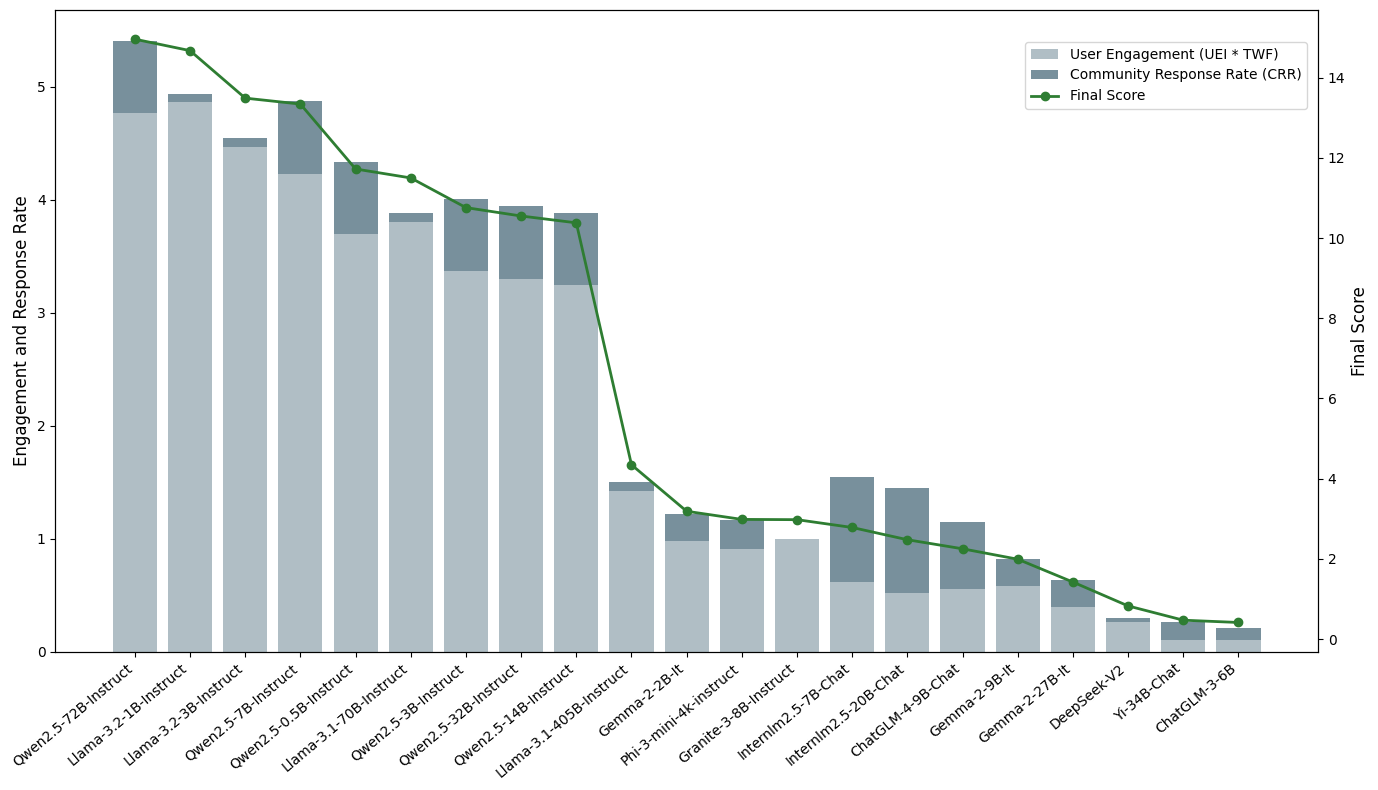

In [3]:
# Initialize the figure and first axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plots on the left y-axis with muted colors
ax1.bar(data["Model Name"], data["UEI"] * data["TWF"], label="User Engagement (UEI * TWF)", color='#B0BEC5')  # Light grey-blue
ax1.bar(data["Model Name"], data["CRR"], label="Community Response Rate (CRR)", 
        bottom=data["UEI"] * data["TWF"], color='#78909C')  # Dark grey-blue
ax1.set_ylabel("Engagement and Response Rate", fontsize=12)
ax1.tick_params(axis='y')

# Secondary axis for the line plot
ax2 = ax1.twinx()
ax2.plot(data["Model Name"], data["Final Score"], marker='o', color='#2E7D32', label="Final Score", linewidth=2)  # Muted dark green
ax2.set_ylabel("Final Score", fontsize=12)
ax2.tick_params(axis='y')

# Customize x-axis
ax1.set_xticklabels(data["Model Name"], rotation=40, ha='right')

# Position the legend for clarity
fig.legend(loc="upper right", bbox_to_anchor=(0.95, 0.95), fontsize=10)

# Tight layout for neatness
fig.tight_layout()

# Save
plt.savefig("fig1.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()